In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import os, glob

In [2]:
# Getting Files Situated
data_file = "SSBM_NTSC_Fall_Speeds_Gravity_Weight.csv"
data_file_path = "datasets/{}".format(data_file)
char_attributes = pd.read_csv(data_file_path)

# Adjust the Percentage Format of "Speed Increase" to be a Float
char_attributes['Speed Increase'] = char_attributes['Speed Increase'].str.rstrip('%').astype(float)/100.0

# # Average Speed ( Avg of Regular and Fast Fall Speeds )
# char_attributes["Average Falling Speed"] = (char_attributes["Regular Falling Speed"] + char_attributes["Fast Falling Speed"])/2

# # Generating for Critical Moments
# critical_counts = [1,2,3,4,5,6]
# for count in critical_counts:
#     heading_reg = "Reg Fall {}fr".format(count)
#     char_attributes[heading_reg] = char_attributes["Gravity"]*count*count
#     char_attributes[heading_reg] = char_attributes[["Regular Falling Speed",heading_reg]].min(axis="columns")
    
#     heading_fast = "Fast Fall {}fr".format(count)
#     char_attributes[heading_fast] = char_attributes["Gravity"]*count*count
#     char_attributes[heading_fast] = char_attributes[["Fast Falling Speed",heading_fast]].min(axis="columns")

# Next steps involve computing a column for the time it takes characters to reach their respective max speeds.
# This will give a clearer sense of combo timings.

#char_attributes["Reg Fall 5fr"] - char_attributes["Regular Falling Speed"]

In [3]:
# Normalize wrt Columns via Z-Scoring
from scipy.stats import zscore
z_labels = ["Z {}".format(x) for x in char_attributes.columns[1:] ]
index_cap = len(char_attributes.columns[1:])+1

char_attributes[z_labels] = char_attributes.iloc[:,1:index_cap].apply(zscore)
char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Z Regular Falling Speed,Z Fast Falling Speed,Z Gravity,Z Speed Increase,Z Weight,Z Air Friction
0,Bowser,1.9,2.40,0.130,0.263,117,0.010,-0.104299,-0.217846,0.728191,-0.301500,1.641298,-0.528828
1,Captain Falcon,2.9,3.50,0.130,0.207,104,0.010,2.065123,1.975955,0.728191,-0.728527,0.851044,-0.528828
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.020,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.406514
3,Dr. Mario,1.7,2.30,0.095,0.353,100,0.016,-0.538183,-0.417282,-0.292847,0.384794,0.607888,0.032377
4,Falco,3.1,3.50,0.170,0.129,80,0.020,2.499007,1.975955,1.895093,-1.323315,-0.607888,0.406514


In [14]:
# Add Image Paths

image_paths = ['ssbm_stock_icons/BowserHeadSSBM.png',
 'ssbm_stock_icons/CaptainFalconHeadSSBM.png',
 'ssbm_stock_icons/DonkeyKongHeadSSBM.png',
 'ssbm_stock_icons/DrMarioHeadSSBM.png',
 'ssbm_stock_icons/FalcoHeadSSBM.png',
 'ssbm_stock_icons/FoxHeadSSBM.png',
 'ssbm_stock_icons/GanondorfHeadSSBM.png',
 'ssbm_stock_icons/IceClimbersHeadSSBM.png',
 'ssbm_stock_icons/JigglypuffHeadSSBM.png',
 'ssbm_stock_icons/KirbyHeadSSBM.png',
 'ssbm_stock_icons/LinkHeadSSBM.png',
 'ssbm_stock_icons/LuigiHeadSSBM.png',
 'ssbm_stock_icons/MarioHeadSSBM.png',
 'ssbm_stock_icons/MarthHeadSSBM.png',
 'ssbm_stock_icons/MewtwoHeadSSBM.png',
 'ssbm_stock_icons/MrGame&WatchHeadSSBM.png',
 'ssbm_stock_icons/NessHeadSSBM.png',
 'ssbm_stock_icons/PeachHeadSSBM.png',
 'ssbm_stock_icons/PichuHeadSSBM.png',
 'ssbm_stock_icons/PikachuHeadSSBM.png',
 'ssbm_stock_icons/RoyHeadSSBM.png',
 'ssbm_stock_icons/SamusHeadSSBM.png',
 'ssbm_stock_icons/SheikHeadSSBM.png',
 'ssbm_stock_icons/YoshiHeadSSBM.png',
 'ssbm_stock_icons/YoungLinkHeadSSBM.png',
 'ssbm_stock_icons/ZeldaHeadSSBM.png']

image_paths = ["assets/{}".format(x) for x in image_paths]

char_attributes["Image_paths"] = image_paths
char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Air Friction,Z Regular Falling Speed,Z Fast Falling Speed,Z Gravity,Z Speed Increase,Z Weight,Z Air Friction,Image_paths
0,Bowser,1.9,2.40,0.130,0.263,117,0.010,-0.104299,-0.217846,0.728191,-0.301500,1.641298,-0.528828,assets/ssbm_stock_icons/BowserHeadSSBM.png
1,Captain Falcon,2.9,3.50,0.130,0.207,104,0.010,2.065123,1.975955,0.728191,-0.728527,0.851044,-0.528828,assets/ssbm_stock_icons/CaptainFalconHeadSSBM.png
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.020,0.980412,0.898998,-0.146985,-0.530265,1.458932,0.406514,assets/ssbm_stock_icons/DonkeyKongHeadSSBM.png
3,Dr. Mario,1.7,2.30,0.095,0.353,100,0.016,-0.538183,-0.417282,-0.292847,0.384794,0.607888,0.032377,assets/ssbm_stock_icons/DrMarioHeadSSBM.png
4,Falco,3.1,3.50,0.170,0.129,80,0.020,2.499007,1.975955,1.895093,-1.323315,-0.607888,0.406514,assets/ssbm_stock_icons/FalcoHeadSSBM.png


In [15]:
z_pairs = [ (x,y) for x in z_labels for y in z_labels if x != y ]

In [16]:
# # Before clustering, setup label list from the Character variable
# labelList = list(char_attributes["Character"].unique())
# labelList[:5]

In [29]:
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=0.5)

def gen_images_rep_on_xy(x_param,y_param):
    # DEPRECATED
    #     x_param = "Z_Gravity"
    #     y_param = "Z_Weight"


    x = char_attributes[x_param]
    y = char_attributes[y_param]
    paths = char_attributes["Image_paths"]


    fig, ax = plt.subplots()
    ax.scatter(x, y) 

    # # Linear Regression
    # m, b = np.polyfit(x, y, 1)
    # plt.plot(x, m*x+b)

    for x0, y0, p0 in zip(x, y,paths):
        ab = AnnotationBbox(getImage(p0), (x0, y0), frameon=False)
        ax.add_artist(ab)

    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param)
    
    name = "{}_vs_{}_in_SSBM_Mains_Cast.png".format(x_param,y_param)
    fig.savefig(name)
#    plt.imsave(name)
    plt.close()
    

In [30]:
for x,y in z_pairs:
    gen_images_rep_on_xy(x,y)

Text(0, 0.5, 'Z Fast Falling Speed')

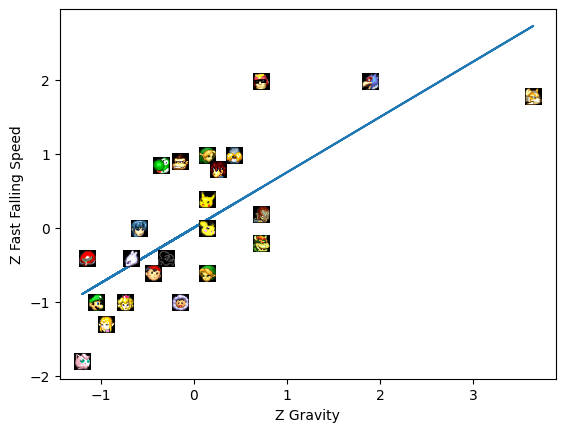

In [27]:
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=0.5)

#samp["paths"] = paths

#samp = char_attributes[["Character","Z_Gravity","Z_Weight","Z_Regular_Falling_Speed",,"Image_paths"]]
x_param = "Z Gravity"
y_param = "Z Fast Falling Speed"


x = char_attributes[x_param]
y = char_attributes[y_param]
paths = char_attributes["Image_paths"]



fig, ax = plt.subplots()
ax.scatter(x, y) 

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

for x0, y0, p0 in zip(x, y,paths):
    ab = AnnotationBbox(getImage(p0), (x0, y0), frameon=False)
    ax.add_artist(ab)

ax.set_xlabel(x_param)
ax.set_ylabel(y_param)


In [26]:
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=1)

paths = [
    'ssbm_stock_icons/IceClimbersHeadSSBM.png',
    'f.jpg',
    'c.jpg',
    'd.jpg',
    'e.jpg']

samp["paths"] = paths

samp = char_attributes[0:5][["Character","Z_Regular_Falling_Speed","Z_Weight"]]
x = [1,2,3,4,5]
y = [1,2,3,4,5]

fig, ax = plt.subplots()

ax.scatter(x, y) 

for x0, y0, p0 in zip(x, y,paths):
    ab = AnnotationBbox(getImage(p0), (x0, y0), frameon=False)
    ax.add_artist(ab)



NameError: name 'samp' is not defined

In [19]:
samp

,Character,Z_Regular_Falling_Speed,Z_Weight
0,Bowser,-0.104299,1.641298
1,Captain Falcon,2.065123,0.851044
2,Donkey Kong,0.980412,1.458932
3,Dr. Mario,-0.538183,0.607888
4,Falco,2.499007,-0.607888


In [24]:
char_attributes["Character"]

0               Bowser
1       Captain Falcon
2          Donkey Kong
3            Dr. Mario
4                Falco
5                  Fox
6            Ganondorf
7         Ice Climbers
8           Jigglypuff
9                Kirby
10                Link
11               Luigi
12               Mario
13               Marth
14              Mewtwo
15    Mr. Game & Watch
16                Ness
17               Peach
18               Pichu
19             Pikachu
20                 Roy
21               Samus
22               Sheik
23               Yoshi
24          Young Link
25               Zelda
Name: Character, dtype: object

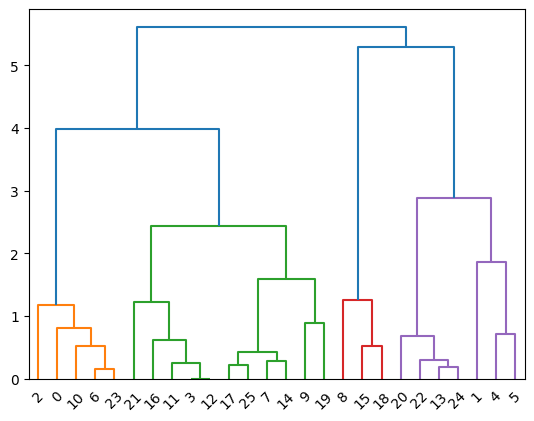

In [77]:
# Create linkage method using Ward's method
link_method = linkage(char_attributes[["Z_Regular_Falling_Speed","Z_Weight"]], method = 'ward')

# Generate & Visualize the dendrogram
dend = dendrogram(link_method
                  #,labels = labelList
                  #,truncate_mode='lastp'
                  #,p=10
                 )

In [189]:
# Method 1: criterion = 'maxclust' where a cut is defined based on the number of clusters
clusters_max = fcluster(link_method, 12, criterion='maxclust') 
#clusters_max

# Method 2: criterion='distance' where a cut is defined based on distance in the y-axis
clusters_dist = fcluster(link_method, 1.5, criterion='distance')
#clusters_dist

#Apply the clusters back to the dataset
char_attributes['HCluster_max'] = clusters_max
char_attributes['HCluster_dist'] = clusters_dist
# df['HCluster_dist'] = clusters_dist
char_attributes.head()

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,HCluster_max,HCluster_dist,HClusters_based_on_Max,HCluster
0,Bowser,1.9,2.40,0.130,0.263,117,-0.104299,-0.217846,0.728191,-0.301500,1.641298,1,1,Bulky,Bulky
1,Captain Falcon,2.9,3.50,0.130,0.207,104,2.065123,1.975955,0.728191,-0.728527,0.851044,12,8,12,12
2,Donkey Kong,2.4,2.96,0.100,0.233,114,0.980412,0.898998,-0.146985,-0.530265,1.458932,2,1,Awkward_Heavies,Awkward_Heavies
3,Dr. Mario,1.7,2.30,0.095,0.353,100,-0.538183,-0.417282,-0.292847,0.384794,0.607888,3,2,Awkward_Floaties,Awkward_Floaties
4,Falco,3.1,3.50,0.170,0.129,80,2.499007,1.975955,1.895093,-1.323315,-0.607888,11,7,11,11


In [190]:
# Analyze Data in Terms of HClusters
# Cluster_Max
aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_max').mean()
aggdata_max['Frequency']=char_attributes.HCluster_max.value_counts().sort_index()
aggdata_max

/tmp/ipykernel_114122/3755514599.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_max').mean()


,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,HCluster_dist,Frequency
HCluster_max,,,,,,,,,,,,
1,1.9900,2.7325,0.11575,0.37225,109.50,0.090949,0.445280,0.312483,0.531584,1.185382,1.0,4
2,2.4000,2.9600,0.10000,0.23300,114.00,0.980412,0.898998,-0.146985,-0.530265,1.458932,1.0,1
3,1.7075,2.2000,0.08725,0.28950,98.50,-0.521913,-0.616719,-0.518935,-0.099425,0.516705,2.0,4
4,1.4000,2.3000,0.06600,0.64300,110.00,-1.189010,-0.417282,-1.138851,2.596185,1.215777,2.0,1
5,1.5000,2.0375,0.08375,0.35925,88.25,-0.972068,-0.940803,-0.621038,0.432453,-0.106380,3.0,4
6,1.6000,2.0000,0.08000,0.25000,70.00,-0.755126,-1.015592,-0.730436,-0.400631,-1.215777,4.0,1
7,1.9000,2.7000,0.11000,0.42100,80.00,-0.104299,0.380463,0.144741,0.903327,-0.607888,4.0,1
8,1.8000,2.4000,0.10250,0.33450,57.50,-0.321241,-0.217846,-0.074053,0.243722,-1.975637,5.0,2
9,1.3000,1.6000,0.06400,0.23100,60.00,-1.405952,-1.813338,-1.197196,-0.545516,-1.823665,5.0,1


In [191]:
# # Analyze Data in Terms of HClusters
# # Cluster_Max
# aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_dist').mean()
# aggdata_max['Frequency']=char_attributes.HCluster_dist.value_counts().sort_index()
# aggdata_max

In [192]:
for clst in range(1,1+len(char_attributes["HCluster_max"].unique())):
    print(char_attributes[char_attributes["HCluster_max"]==clst][["Character","Z_Regular_Falling_Speed","Z_Weight"]])

    Character  Z_Regular_Falling_Speed  Z_Weight
0      Bowser                -0.104299  1.641298
6   Ganondorf                 0.112643  1.154988
10       Link                 0.394668  0.851044
23      Yoshi                -0.039216  1.094199
     Character  Z_Regular_Falling_Speed  Z_Weight
2  Donkey Kong                 0.980412  1.458932
    Character  Z_Regular_Falling_Speed  Z_Weight
3   Dr. Mario                -0.538183  0.607888
11      Luigi                -0.755126  0.607888
12      Mario                -0.538183  0.607888
16       Ness                -0.256159  0.243155
   Character  Z_Regular_Falling_Speed  Z_Weight
21     Samus                 -1.18901  1.215777
       Character  Z_Regular_Falling_Speed  Z_Weight
7   Ice Climbers                -0.755126 -0.121578
14        Mewtwo                -0.972068 -0.303944
17         Peach                -0.972068  0.000000
25         Zelda                -1.189010  0.000000
  Character  Z_Regular_Falling_Speed  Z_Weight
9     K

In [159]:
# for clst in range(1,1+len(char_attributes["HCluster_dist"].unique())):
#     print(char_attributes[char_attributes["HCluster_dist"]==clst][["Character","Regular Falling Speed","Weight"]])

In [160]:
# char_attributes

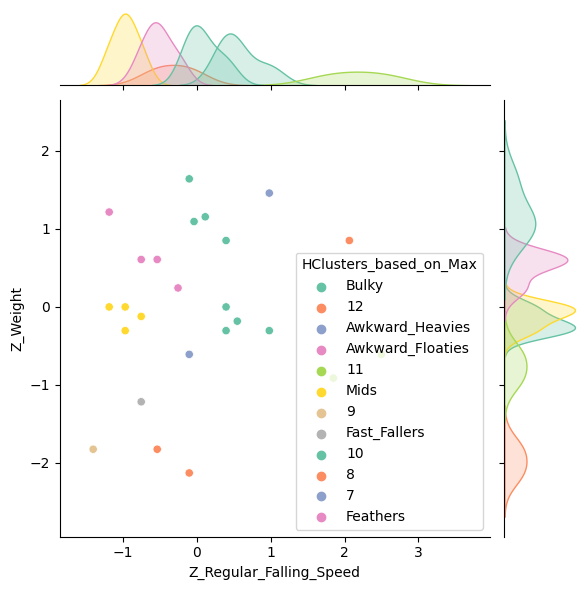

In [193]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster"].apply(str)

sns.jointplot(data=char_attributes,
              x="Z_Regular_Falling_Speed",
              y="Z_Weight",
              hue="HClusters_based_on_Max",
              palette="Set2"
             )

In [169]:
new_labels = ["Bulky","Awkward_Heavies", "Samus","Slightly Light Floaties", "Kirby","Pika","Feathers","Puff", "Mids","Fast_Fallers","Falcon"]

char_attributes["HCluster"] = char_attributes["HCluster_max"]

i = 1
for label in new_labels:
    print(i,label)
    char_attributes["HCluster"] = char_attributes["HCluster"].replace(i,label)
    i+=1

1 Bulky
2 Awkward_Heavies
3 Awkward_Floaties
4 Feathers
5 Mids
6 Fast_Fallers


In [184]:
clst = 3
char_attributes[char_attributes["HCluster_max"]==clst]

,Character,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,Z_Regular_Falling_Speed,Z_Fast_Falling_Speed,Z_Gravity,Z_Speed_Increase,Z_Weight,HCluster_max,HCluster_dist,HClusters_based_on_Max,HCluster
3,Dr. Mario,1.70,2.3,0.095,0.353,100,-0.538183,-0.417282,-0.292847,0.384794,0.607888,3,2,Awkward_Floaties,Awkward_Floaties
11,Luigi,1.60,2.0,0.069,0.250,100,-0.755126,-1.015592,-1.051333,-0.400631,0.607888,3,2,Awkward_Floaties,Awkward_Floaties
12,Mario,1.70,2.3,0.095,0.353,100,-0.538183,-0.417282,-0.292847,0.384794,0.607888,3,2,Awkward_Floaties,Awkward_Floaties
16,Ness,1.83,2.2,0.090,0.202,94,-0.256159,-0.616719,-0.438710,-0.766655,0.243155,3,2,Awkward_Floaties,Awkward_Floaties


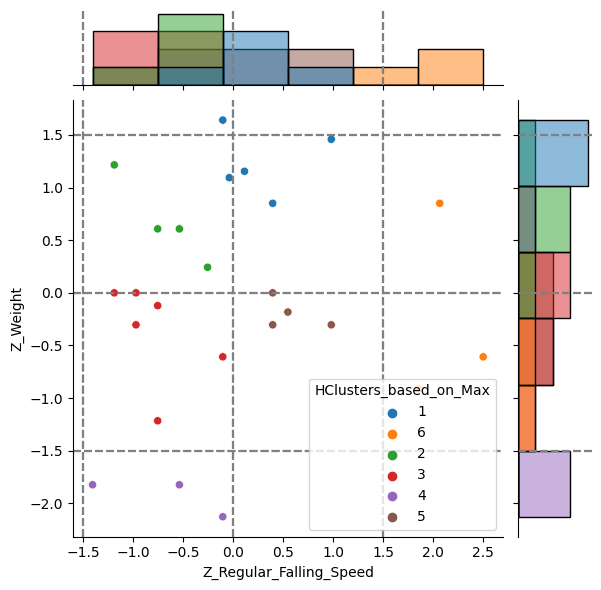

In [76]:
g = sns.JointGrid(data=char_attributes, x="Z_Regular_Falling_Speed", y="Z_Weight", hue="HClusters_based_on_Max")
g.plot(sns.scatterplot, sns.histplot)

# Add Distribution Lines
temp_x = -1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 0
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

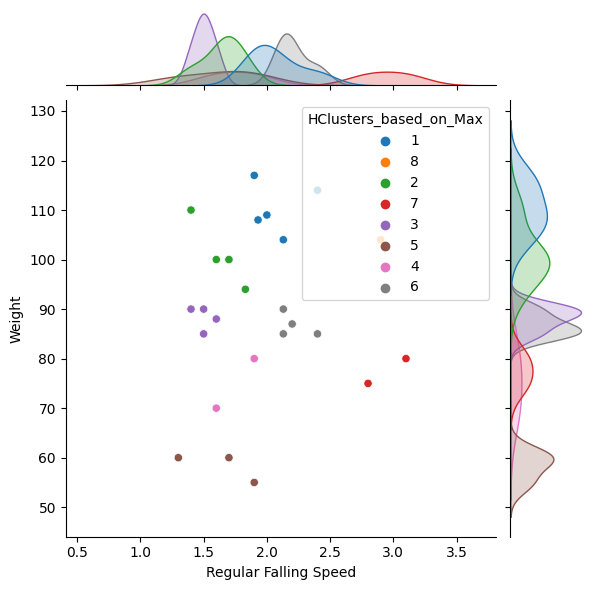

In [42]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster_max"].apply(str)

sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Weight", hue="HClusters_based_on_Max");

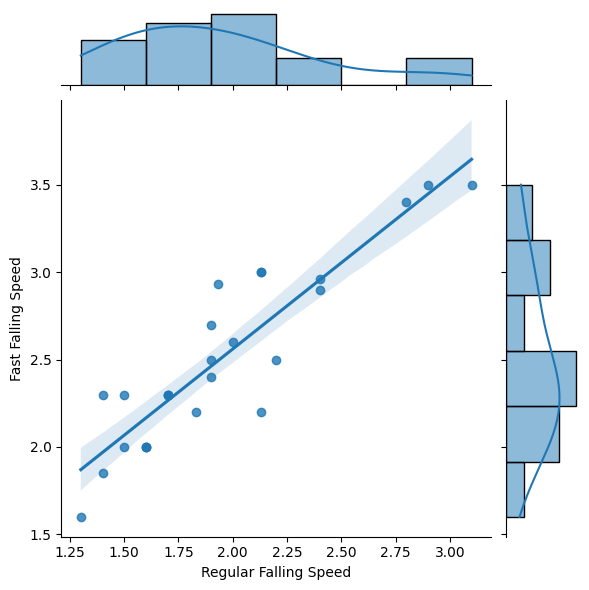

In [13]:
sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Fast Falling Speed", kind="reg");

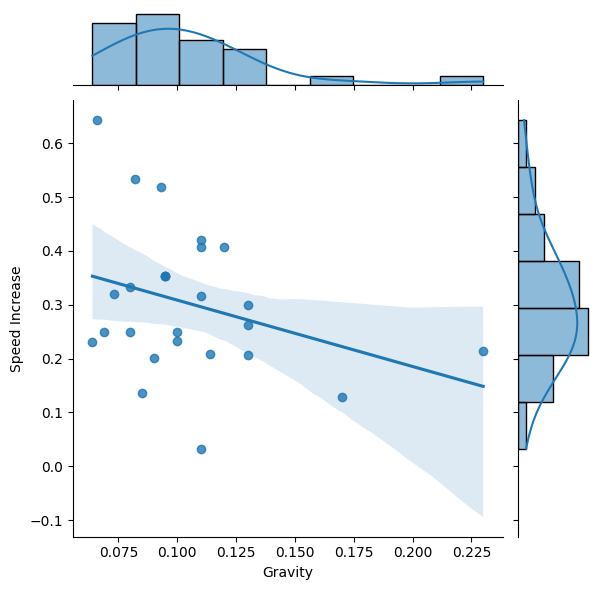

In [29]:
sns.jointplot(data=char_attributes, x="Gravity", y="Speed Increase", kind="reg");

In [15]:
char_attributes.iloc[:,1:7]

,Regular Falling Speed,Fast Falling Speed,Gravity,Speed Increase,Weight,HCluster_max
0,1.90,2.40,0.130,0.263,117,1
1,2.90,3.50,0.130,0.207,104,1
2,2.40,2.96,0.100,0.233,114,1
3,1.70,2.30,0.095,0.353,100,1
4,3.10,3.50,0.170,0.129,80,2
5,2.80,3.40,0.230,0.214,75,3
6,2.00,2.60,0.130,0.300,109,1
7,1.60,2.00,0.100,0.250,88,2
8,1.30,1.60,0.064,0.231,60,3
9,1.60,2.00,0.080,0.250,70,3
